<a href="https://colab.research.google.com/github/emailic/YOLOv5-Microplasticos/blob/main/Visualize_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file serves to visualize the bounding boxes in yolov5 format. I made it because I couldn't find another way of visualizing the recently converted yolov5 text files from labelme json files with polygons as  labels.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

#Visualize image with yolo labels
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches
from matplotlib.patches import Rectangle



#img.show()
#plt.imshow(img)

#write image name without jpg ending
image='DSC00003.jpg_grid_1152_1728'
img = Image.open('/content/drive/My Drive/microplasticos/images/train_576/'+image+'.jpg') 
label_path='/content/drive/My Drive/microplasticos/labels/train_576/'+ image +'.txt'
txt_file = open(label_path, "r")
print(txt_file)

<_io.TextIOWrapper name='/content/drive/My Drive/microplasticos/labels/train_576/DSC00003.jpg_grid_1152_1728.txt' mode='r' encoding='UTF-8'>


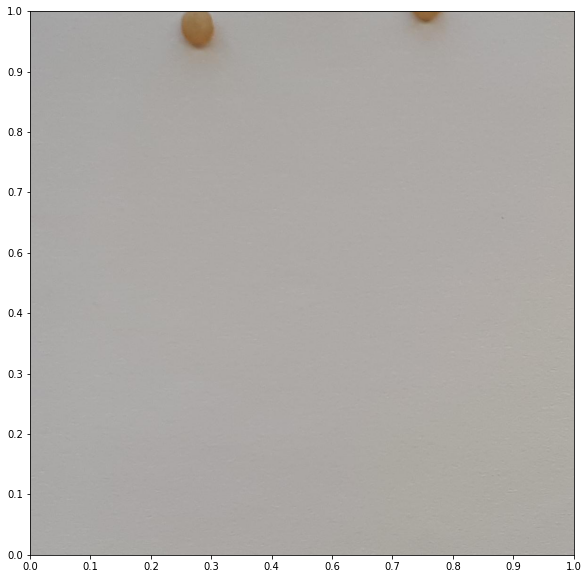

In [ ]:
#BIG IMAGES 



# -*- coding: utf-8 -*-
"""
Created on Sun May 15 16:56:19 2022

@author: email
"""


lines = txt_file.read().split('\n') 
bbl=list() #bounding box list
for line in lines:
    data=line.split()
    #print(data)
    if len(data)==5:
        bbl.append(data[1:])
#print(bbl)

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

# data interpretation: https://docs.ultralytics.com/tutorials/train-custom-datasets/
# next step: conver these coordinates to bottom left + width and height
# and dont forget to multiply everything by 3456 so that it 
#gets correctly plotted


xy2imgxy = lambda x,y: (img.size[0] * x / np.max(ticklx),\
                        img.size[1] * (np.max(tickly) - y) / np.max(tickly))

ticklx = np.linspace(0,1,10)
tickly = np.linspace(0,1,10)
tickpx,tickpy = xy2imgxy(ticklx,tickly)

# Rewrite x,y ticks
ax.set_xticks(tickpx)
ax.set_yticks(tickpy)
ax.set_xticklabels(ticklx.round(1).astype('float'))
ax.set_yticklabels(tickly.round(1).astype('float'))


def plot_bb():
    for rect in bbl:
        #coordinates of the bottom left corner
        c= ((float(rect[0])-0.5*float(rect[2]))*4608, (float(rect[1])-0.5*float(rect[3]))*3456 )
        # Create a Rectangle patch
        rect = Rectangle(c,float(rect[2])*4608,float(rect[3])*3456,linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

plot_bb()

# Adjust the axis.
ax.set_xlim(0,tickpx.max())
ax.set_ylim(tickpy.max(),0)

# Save figure.
#plt.savefig("lena_color_mod.png",bbox_inches="tight",pad_inches=0.02,dpi=3456, figsize=3456)
plt.show()

['3 0.24480583900226754 0.41962159863945586 0.1061224489795918 0.12244897959183679', '3 0.3679430626417236 0.3996837797619049 0.09693877551020408 0.1683673469387755', '3 0.533271329365079 0.4372143388605444 0.07142857142857156 0.13316326530612235', '3 0.7012728528911567 0.5520129145408161 0.1010204081632653 0.13010204081632645', '3 0.5148251488095236 0.5772480867346939 0.16224489795918362 0.1530612244897959', '3 0.6720167233560089 0.747944568452381 0.1061224489795918 0.11479591836734693', '3 0.1706623795351475 0.5421077806122451 0.09897959183673469 0.07959183673469403', '3 0.5693000637755099 0.8795639349489797 0.1010204081632653 0.13010204081632645', '3 0.5693000637755099 0.8795639349489797 0.1010204081632653 0.13010204081632645', '3 0.5693000637755099 0.8795639349489797 0.1010204081632653 0.13010204081632645', '3 0.4781436011904763 0.7173190369897957 0.1010204081632653 0.13010204081632645', '3 0.4781436011904763 0.7173190369897957 0.1010204081632653 0.13010204081632645', '3 0.47814360

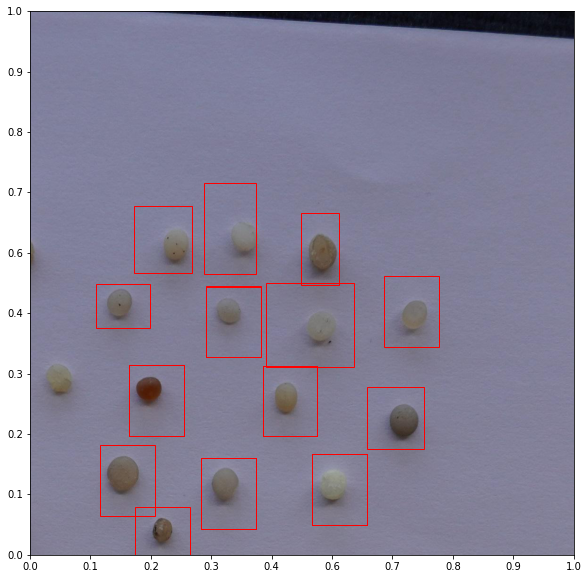

In [ ]:
#1152 IMAGES 



# -*- coding: utf-8 -*-
"""
Created on Sun May 15 16:56:19 2022

@author: email
"""


lines = txt_file.read().split('\n')
print(lines) 
bbl=list() #bounding box list
for line in lines:
    data=line.split()
    #print(data)
    if len(data)==5:
        bbl.append(data[1:])
#print(bbl)

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

# data interpretation: https://docs.ultralytics.com/tutorials/train-custom-datasets/
# next step: conver these coordinates to bottom left + width and height
# and dont forget to multiply everything by 3456 so that it 
#gets correctly plotted


xy2imgxy = lambda x,y: (img.size[0] * x / np.max(ticklx),\
                        img.size[1] * (np.max(tickly) - y) / np.max(tickly))

ticklx = np.linspace(0,1,10)
tickly = np.linspace(0,1,10)
tickpx,tickpy = xy2imgxy(ticklx,tickly)

# Rewrite x,y ticks
ax.set_xticks(tickpx)
ax.set_yticks(tickpy)
ax.set_xticklabels(ticklx.round(1).astype('float'))
ax.set_yticklabels(tickly.round(1).astype('float'))

print(bbl)

def plot_bb():
    for rect in bbl:
        #coordinates of the bottom left corner
        c= ((float(rect[0])-0.5*float(rect[2]))*1152, (float(rect[1])-0.5*float(rect[3]))*1152 )
        # Create a Rectangle patch
        rect = Rectangle(c,float(rect[2])*1152,float(rect[3])*1152,linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

plot_bb()

# Adjust the axis.
ax.set_xlim(0,tickpx.max())
ax.set_ylim(tickpy.max(),0)

# Save figure.
#plt.savefig("lena_color_mod.png",bbox_inches="tight",pad_inches=0.02,dpi=3456, figsize=3456)
plt.show()

['3 0.4430224867724866 0.04292623299319728 0.2965986394557822 0.08585246598639457', '3 0.7995323129251696 0.09801764455782269 0.26938775510204077 0.19603528911564538', '3 0.7995323129251696 0.09801764455782269 0.26938775510204077 0.19603528911564538', '3 0.6907976190476193 0.3920176445578228 0.26938775510204077 0.2602040816326529', '3 0.2228248299319736 0.5512625425170063 0.26938775510204077 0.2602040816326529', '3 0.8214642857142862 0.5788135629251704 0.26938775510204077 0.2602040816326529', '']
[['0.4430224867724866', '0.04292623299319728', '0.2965986394557822', '0.08585246598639457'], ['0.7995323129251696', '0.09801764455782269', '0.26938775510204077', '0.19603528911564538'], ['0.7995323129251696', '0.09801764455782269', '0.26938775510204077', '0.19603528911564538'], ['0.6907976190476193', '0.3920176445578228', '0.26938775510204077', '0.2602040816326529'], ['0.2228248299319736', '0.5512625425170063', '0.26938775510204077', '0.2602040816326529'], ['0.8214642857142862', '0.57881356292

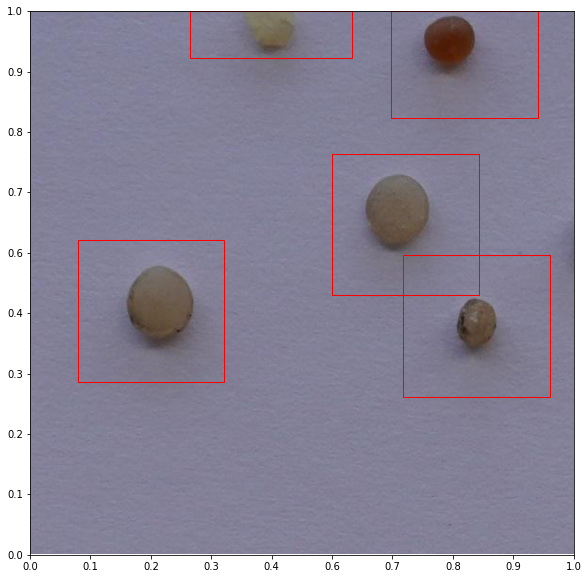

In [ ]:
#576 IMAGES 



# -*- coding: utf-8 -*-
"""
Created on Sun May 15 16:56:19 2022

@author: email
"""


lines = txt_file.read().split('\n')
print(lines) 
bbl=list() #bounding box list
for line in lines:
    data=line.split()
    #print(data)
    if len(data)==5:
        bbl.append(data[1:])
#print(bbl)

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

# data interpretation: https://docs.ultralytics.com/tutorials/train-custom-datasets/
# next step: conver these coordinates to bottom left + width and height
# and dont forget to multiply everything by 3456 so that it 
#gets correctly plotted


xy2imgxy = lambda x,y: (img.size[0] * x / np.max(ticklx),\
                        img.size[1] * (np.max(tickly) - y) / np.max(tickly))

ticklx = np.linspace(0,1,10)
tickly = np.linspace(0,1,10)
tickpx,tickpy = xy2imgxy(ticklx,tickly)

# Rewrite x,y ticks
ax.set_xticks(tickpx)
ax.set_yticks(tickpy)
ax.set_xticklabels(ticklx.round(1).astype('float'))
ax.set_yticklabels(tickly.round(1).astype('float'))

print(bbl)

def plot_bb():
    for rect in bbl:
        #coordinates of the bottom left corner
        c= ((float(rect[0])-0.5*float(rect[2]))*576, (float(rect[1])-0.5*float(rect[3]))*576 )
        # Create a Rectangle patch
        rect = Rectangle(c,float(rect[2])*576,float(rect[3])*576,linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

plot_bb()

# Adjust the axis.
ax.set_xlim(0,tickpx.max())
ax.set_ylim(tickpy.max(),0)

# Save figure.
#plt.savefig("lena_color_mod.png",bbox_inches="tight",pad_inches=0.02,dpi=3456, figsize=3456)
plt.show()